# Dealing with Missing Data - Lab

## Introduction

In this lab, we'll work through strategies for data cleaning and dealing with null values (NaNs).

## Objectives
* Detect missing data in Pandas using .describe(), .info(), .isnull and .notnull
* Replace/drop missing data in Pandas using .fillna and .dropna


## Dataset

In this lab, we'll continue working with the _Titanic Survivors_ dataset, which can be found in `titanic.csv`.

Before we can get going, we'll need to import the usual libraries.  In the cell below, import:
* `pandas` as `pd`
* `numpy` as `np`
* `matplotlib.pyplot` as `plt`
* set `%matplotlib inline`

In [84]:
# Import necessary libraries below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, let's get started by reading in the data from the **titanic.csv** file and storing it in a DataFrame in the `df` variable below. Subsequently, be sure to preview the data.

In [85]:
#Use pandas to load the csv file
df = pd.read_csv('titanic.csv')
df.head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Finding Null Values in a DataFrame

Before we can deal with null values, we first need to find them. There are several easy ways to detect them.  We will start by answering very general questions, such as "does this DataFrame contain any null values?", and then narrowing our focus each time the answer to a question is "yes".

We'll start by checking to see if the DataFrame contains **any** null values (NaNs) at all. 

**_Hint_**: If you do this correctly, it will require method chaining, and will return a boolean value for each column.  

In [86]:
#Your code here
df.isna().sum()
# note: df.isna() returns a matrix of boolean values, where all cells containing NaN are converted to True (= 1)
# and all cells containing valid data are converted to False (= 0)
# finding the sum add all the 1 (true values) together

# In this case column age contains 177 NaN values, cabin contain 687 NaN values, and embarked contains 2 NaN values

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now we know which columns contain null values, but not how many. 

In the cell below, check chain a different method with `isna()` to check how many total null values are in each column.  

Expected Output:

```
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64```

In [87]:
# practice using .isna() because above I had already found how many of the values were NaN
#Your code here
df.isna().any()

Unnamed: 0     False
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Now that we know how many null values exist in each column, we can make some decisions about how to deal with them.  

We'll deal with each column individually, and employ a different strategy for each.  


### Dropping the Column

The first column we'll deal with is the `Cabin` column.  We'll begin by examining this column more closely. 


In the cell below:
* Determine what percentage of rows in this column contain missing values
* Print out the number of unique values in this column

In [88]:
#Your code here
df.info()
# What I did below is that I found the numner of rows that had missing values in the Cabin column and divided it 
# by the total number of rows the df has
print(round((687/891), 2))
# another way to do the above is:
# print(len(df[df.Cabin.isna()])/ len(df))
print('77% of rows are containing missing values')
df['Cabin'].nunique()
# .nunique() give the number of unique items in the column chosen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Unnamed: 0     891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
0.77
77% of rows are containing missing values


147

With this many missing values, it's probably best for us to just drop this column completely.

In the cell below:

* drop the `Cabin` column in place from the `df` DataFrame
* Then, check the remaining number of null values in the data set by using the code you wrote previously.  

In [89]:
#Your code here
# df.drop(columns = ['Cabin'], inplace=True) <-- this changes the df
# need to put inplace=True, so that the data will change for real, and not just make a copy
# Note, if you did not what to change the original structure of the the df, you make a new one. 
# In the case below df is updated
df = df.drop(columns = ['Cabin'])
df.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Computing Placeholder Values

Recall that another common strategy for dealing with null values is to replace them with the mean or median for that column.  We'll begin by investigating the current version of the `'Age'` column.  

In the cell below:

* Plot a histogram of values in the `'Age'` column with 80 bins (1 for each year).   
* Print out the mean and median for the column.  

Mean: 29.7
Median: 28.0


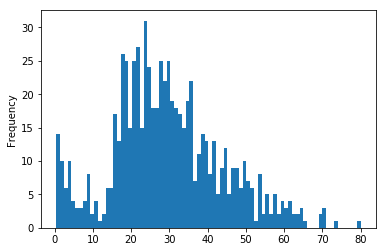

In [90]:
# Your code here
# plt.hist(df['Age'], bins=80)
# plt.ylabel('Frequency');
# Note that the above way also prints the graph, but it does not fill in the labels, you would have to do that
df['Age'].plot(kind='hist', bins=80);
# Note that the above way, you put the dataframe you want to use for the plot, that is the kind of histogram
print('Mean:', round(df.Age.mean(), 2))
print('Median:', df.Age.median())
# Note that the histagram shows a positive skew because it leans to the left

# Alternative way to find the mean and median:
# age_mean = df.Age.mean()
# age_median = df.Age.median()
# print("Mean Value for Age column: {}".format(age_mean))
# print("Median Value for Age column: {}".format(age_median))

From the visualization above, we can see the data has a slightly positive skew. 

In the cell below, replace all null values in the `'Age'` column with the median of the column.  **Do not hard code this value--use the methods from pandas or numpy to make this easier!**  Do this replacement in place on the DataFrame. 

In [91]:
# Your code here
# df.Age.fillna(df.Age.median(), inplace=True) <-- changes the df
# Alternative way:
df.Age = df.Age.fillna(value=df.Age.median)
# setting a new variable to the original df


Now that we've replaced the values in the `'Age'` column, let's confirm that they've been replaced.  

In the cell below, check how many null values remain in the dataset.  

In [92]:
# Your code here
df.isna().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Great! Now we need to deal with the two pesky null values in the `'Embarked'` column.  

### Dropping Rows That Contain Null Values

Perhaps the most common solution to dealing with null values is to simply drop any rows that contain them.  Of course, this is only a good idea if the number dropped does not constitute a significant portion of our dataset.  Often, you'll need to make the overall determination to see if dropping the values is an acceptable loss, or if it is a better idea to just drop an offending column (e.g. the `'Cabin'` column) or to impute placeholder values instead.

In the cell below, use the appropriate built-in DataFrame method to drop the rows containing null values. Do this in place on the DataFrame.  

In [93]:
# Your code here
# df.dropna(inplace=True) <-- changes the df completely
# df.isna().sum()

# Alternative way:
df = df.dropna()
df.isna().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Great! We've dealt with all the **_obvious_** null values, but we should also take some time to make sure that there aren't symbols or numbers included that are meant to denote a missing value. 

### Missing Values with Placeholders

A common thing to see when working with datasets is missing values denoted with a preassigned code or symbol.  Let's check to ensure that each categorical column contains only what we expect.

In the cell below, return the unique values in the `'Embarked'`, `'Sex'`, `'Pclass'`, and `'Survived'` columns to ensure that there are no values in there that we don't understand or can't account for.  

In [94]:
# Your code here
print(df['Embarked'].unique())
print(df['Sex'].unique())
print(df['Pclass'].unique())
print(df['Survived'].unique())

# Alternative way:
# for col in ['Embarked','Sex', 'Pclass','Survived']:
#     print('Values for {}:\n{}\n\n'.format(col, df[col].unique()))

['S' 'C' 'Q']
['male' 'female']
['3' '1' '2' '?']
[0 1]


It Looks like the `'Pclass'` column contains some missing values denoted by a placeholder! 

In the cell below, investigate how many placeholder values this column contains.  Then, deal with these null values using whichever strategy you believe is most appropriate in this case.  

In [95]:
# Your code here
display(df[df['Pclass']=='?'])
print('Number of rows that contain a ? in Pclass:', len(df[df['Pclass']=='?']))
print(round((len(df[df['Pclass']=='?'])/889), 4))

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
25,25,26,1,?,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38,1,5,347077,31.3875,S
37,37,38,0,?,"Cann, Mr. Ernest Charles",male,21,0,0,A./5. 2152,8.0500,S
80,80,81,0,?,"Waelens, Mr. Achille",male,22,0,0,345767,9.0000,S
119,119,120,0,?,"Andersson, Miss. Ellis Anna Maria",female,2,4,2,347082,31.2750,S
146,146,147,1,?,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27,0,0,350043,7.7958,S
180,180,181,0,?,"Sage, Miss. Constance Gladys",female,<bound method Series.median of 0 22.0\n1 ...,8,2,CA. 2343,69.5500,S
221,221,222,0,?,"Bracken, Mr. James H",male,27,0,0,220367,13.0000,S
272,272,273,1,?,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41,0,1,250644,19.5000,S
284,284,285,0,?,"Smith, Mr. Richard William",male,<bound method Series.median of 0 22.0\n1 ...,0,0,113056,26.0000,S
292,292,293,0,?,"Levy, Mr. Rene Jacques",male,36,0,0,SC/Paris 2163,12.8750,C


Number of rows that contain a ? in Pclass: 48
0.054


In [77]:
# Alternative way:
df.Pclass.value_counts(normalize=True)
# This gives the percent of the numbers that show up
# 3 shows up approx. 53%, 1 shows up approx. 22%, 2 shows up approx. 19% and ? shows up approx 5.4%

3    0.527559
1    0.224972
2    0.193476
?    0.053993
Name: Pclass, dtype: float64

In [97]:
# Your code here
# Trying to see if replacing the mode would be good?
# But I feel that it only is 5% of the data, maybe we can just drop the rows by:
df.Pclass = df.drop(df.Pclass == '?')
df.Pclass

KeyError: '[False False False False False False False False False False False False\n False False False False False False False False False False False False\n False  True False False False False False False False False False False\n False  True False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False  True False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False  True False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False  True False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False  True\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False  True False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False  True False False False False\n False False False False False False False  True False False False False\n False False False  True False False False False False  True False False\n False False False False False False False False False False False False\n False False False False False False False False  True False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False  True False False False False False False False\n False False False False False False  True  True False False False False\n False False False False False  True False False False False False False\n False False False False False False False False False False False False\n False False  True  True False False  True False False False False  True\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False  True False False\n False False False False False False False False False False False False\n False False False False False False False  True False False False  True\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False  True  True False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n  True False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False  True False False False False\n False False False False False False False False False False  True False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False  True False False False False False False False False False False\n False False False False False False False False False False False  True\n False False False False False False False False False False  True False\n False False  True False False False False False False False False False\n False False False False False  True False False False  True False False\n False False False False False False False False False False False False\n  True False False False  True False False False False  True False  True\n False False  True False False False False False False False False False\n False False False False False  True False  True False False False False\n False False False False False False False False False False False False\n False False False False False False False False  True False False False\n False False False  True False False False False False False False False\n False False False False False False False False False  True False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False  True False False False False False  True False False False False\n False False False False False False False False False  True False False\n False False False False False False False False False False  True False\n False] not found in axis'

In [98]:
# Alternative:
#Observation: account for 5% of the data
#Method: randomly select a class acccording to current distribution
rel_prob = [.53, .22, .19]
prob = [i/sum(rel_prob) for i in rel_prob]
def impute_pclass(value):
    if value == '?':
        return np.random.choice(['3','1','2'], p=prob)
    else:
        return value
df.Pclass = df.Pclass.map(lambda x: impute_pclass(x))
df.Pclass.value_counts(normalize=True)

3    0.561305
1    0.235096
2    0.203600
Name: Pclass, dtype: float64

**_Question:_** What is the benefit of treating missing values as a separate valid category?  What is the benefit of removing or replacing them? What are the drawbacks of each? Finally, which strategy did you choose? Explain your choice below. 

Write your answer below this line:
______________________________________________________________________________________________________

In [ ]:
# Sample response:

# By treating missing values as a separate category, information is preserved. 
# Perhaps there is a reason that this information is missing. 
# By removing or replacing missing information, we can more easily conduct mathematical analyses which require
# values for computation. 
# I chose to randomly replace for now. I could have just as easily removed the data. 
# Concerns include that I imputed the wrong value (indeed it was a random guess). 
# The strategy for dealing with missing data will depend on our desired application, 
# but regardless of the approach taken, the ramifications of how missing data are handled must be considered. 
# For example, imputing the median of our age reduces variance 
# and assumes that a new value would be close to the center of the distribution 
# (albeit this assumption is statistically likely).

Now, let's do a final check to ensure that there are no more null values remaining in this dataset.  

In the cell below, reuse the code you wrote at the beginning of the notebook to check how many null values our dataset now contains.  

In [99]:
# Your code here
df.isna().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Great! Those all seem in line with our expectations.  We can confidently say that this dataset contains no pesky null values that will mess up our analysis later on!

## Summary

In this lab, we learned:
* How to detect null values in our dataset
* How to deal with null values by dropping rows
* How to deal with null values by imputing mean/median values 
* Strategies for detecting null values encoded with a placeholder